In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.figure import Figure
from matplotlib.axes import Axes

from mpl_toolkits.mplot3d import Axes3D

Функция $f(x, y) = x^4 - 2x^2 + y^3 - 3y$

In [2]:
def f(x: float, y: float) -> float:
    return np.pow(x, 4) - 2 * np.pow(x, 2) + np.pow(y, 3) - 3 * y

Градиент $f(x, y)$ = $(\frac{\partial f}{\partial x}(x, y), \frac{\partial f}{\partial y}(x, y))$

In [3]:
def gradient_f(x: float, y: float) -> tuple[float, float]:
    f_x: float = 4 * x**3 - 4 * x
    f_y: float = 3 * y**2 - 3
    return f_x, f_y

Задаем необходимые константы

In [4]:
X_MIN: int = -2
X_MAX: int = 2
Y_MIN: int = -2
Y_MAX: int = 2
COUNT_NUMBERS: int = 200

CRITICAL_POINTS: list[tuple[int]] = [(-1, -1), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 1)]

Построение графика поверхности $f(x, y)$

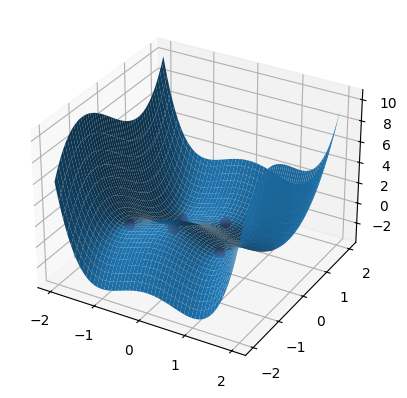

In [5]:
x: np.ndarray = np.linspace(X_MIN, X_MAX, COUNT_NUMBERS)
y: np.ndarray = np.linspace(Y_MIN, Y_MAX, COUNT_NUMBERS)

x, y = np.meshgrid(x, y)

f_x = 4 * x**3 - 4 * x
f_y = 3 * y**2 - 3

z: np.ndarray = x**4 - 2 * x**2 + y**3 - 3 * y

figure: Figure
axes: Axes3D
figure, axes = plt.subplots(subplot_kw={"projection": "3d"})
axes.plot_surface(x, y, z)

for x_0, y_0 in CRITICAL_POINTS:
    z_0 = f(x_0, y_0)
    axes.scatter3D(x_0, y_0, z_0, s=50, c="red")

plt.show()

Построение линий уровня $f(x, y)$

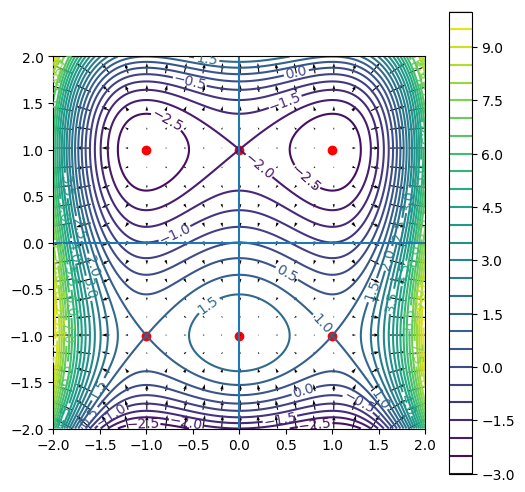

In [ ]:
plt.figure(figsize=(6, 6))
countour_set = plt.contour(x, y, z, levels=25)

for x_0, y_0 in CRITICAL_POINTS:
    plt.scatter(x_0, y_0, c="red")

step: int = 10
plt.quiver(
    x[::step, ::step],
    y[::step, ::step],
    f_x[::step, ::step],
    f_y[::step, ::step]
)

plt.clabel(countour_set)
plt.colorbar(countour_set)
plt.axhline(0)
plt.axvline(0)
plt.gca().set_aspect("equal", "box")
plt.show()